In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 



classNames = []
with open('coco.names','r') as f:
    classNames = f.read().splitlines()
# print(classNames)
# print(len(classNames))


weightsPath = "frozen_inference_graph.pb"
configPath = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)     ## 255/2 = 127.5
net.setInputMean((127.5, 127.5, 127.5))  
net.setInputSwapRB(True)

< cv2.dnn.Model 000002B25107E970>

In [2]:
img = cv2.imread('office.jpg')

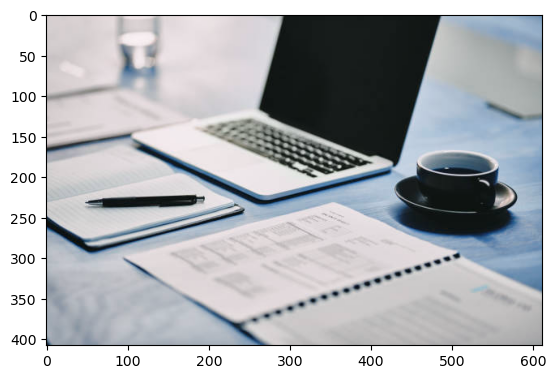

In [3]:
plt.imshow(img)

In [4]:
ClassIndex, confidence, bbox = net.detect(img, confThreshold=0.5)

In [5]:
print(ClassIndex)

[73 84 47]


In [6]:
!pip install pyttsx3

In [7]:
import pyttsx3

# Function to provide voice feedback
def speak(text):
    engine.say(text)
    engine.runAndWait()

# Initialize pyttsx3 engine for voice feedback
engine = pyttsx3.init()

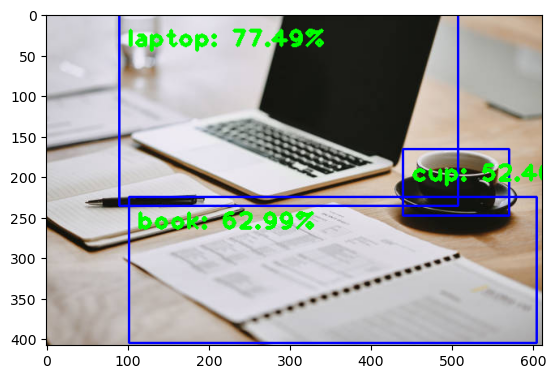

In [8]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    object_name = classNames[ClassInd - 1]
    confidence_percent = round(conf * 100, 2)
    text = f"{object_name}: {confidence_percent}%"
    cv2.putText(img, text, (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
    speak(object_name)  # Provide voice feedback for detected object
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
# Function for object detection in video
def detect_in_video():
    cap = cv2.VideoCapture("Road_traffic_video2.mp4")
    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot Open Video")
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    while True:
        ret, frame = cap.read()
        ClassIndex, confidence, bbox = net.detect(frame, confThreshold=0.55)
        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 91:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    object_name = classNames[ClassInd - 1]
                    confidence_percent = round(conf * 100, 2)
                    text = f"{object_name}: {confidence_percent}%"
                    cv2.putText(frame, text, (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
        cv2.imshow('Object Detection', frame)
        # Check for key press to close the video window
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



In [17]:
# Video detection
detect_in_video()

## Real time

In [9]:
!pip install pyttsx3

In [11]:
import numpy as np
import cv2
import pyttsx3  # Import the pyttsx3 library for text-to-speech

classNames = []
with open('coco.names','r') as f:
    classNames = f.read().splitlines()

weightsPath = "frozen_inference_graph.pb"
configPath = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
net = cv2.dnn_DetectionModel(weightsPath, configPath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)     
net.setInputMean((127.5, 127.5, 127.5))  
net.setInputSwapRB(True)

# Initialize the pyttsx3 engine
engine = pyttsx3.init()

def detect_in_video():
    cap = cv2.VideoCapture(0)  # 0 corresponds to the default webcam
    if not cap.isOpened():
        raise IOError("Cannot Open Webcam")
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    while True:
        ret, frame = cap.read()
        ClassIndex, confidence, bbox = net.detect(frame, confThreshold=0.55)
        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 91:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    object_name = classNames[ClassInd - 1]
                    confidence_percent = round(conf * 100, 2)
                    text = f"{object_name}: {confidence_percent}%"
                    cv2.putText(frame, text, (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
                    # Speak out the detected object
                    # engine.say(object_name)
                    # engine.runAndWait()
        cv2.imshow('Object Detection', frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break  # Break the loop when 'q' is pressed
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start object detection using the webcam
detect_in_video()
